<a href="https://colab.research.google.com/github/HudsonSilverio/projeto_carsales/blob/main/dashboard_carsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando o Sweetviz - ferramenta para visualização descritiva

In [2]:
# Instalar a biblioteca Sweetviz
!pip install sweetviz > /dev/null # final do codigo para deixar a saida mais limpa visualmente

Importando as pricipais bibliotecas e mostrando do data frame

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
from google.colab import files

df = pd.read_csv("data_car.csv", sep=';')

df


,Montadora,Modelo,Potencia,descricao,valor,ano,km_rodado
0,Volkswagen,Gol,1.6,Volkswagen Gol 1.6 Msi Totalflex 4p Manual,52990,2019,101.400
1,Jeep,Compass,2.0,Jeep Compass 2.0 16v Diesel S 4x4 Automático,134900,2020,101.400
2,Fiat,Cronos,1.8,Fiat Cronos 1.8 E.torq Flex Precision At6,69990,2019,101.400
3,Mitsubishi,Asx,2.0,Mitsubishi Asx 2.0 Oneill 4x2 16v Gasolina 4p ...,70900,2016,101.400
4,Renault,Duster,1.6,Renault Duster 1.6 Expression 4x2 16v Flex 4p ...,60990,2016,101.400
...,...,...,...,...,...,...,...
2011,Ford,Ka,Se,Ford Ka Se 1.0 Ha C,49900,2020,79.389
2012,Toyota,Hilux,Sw4,Toyota Hilux Sw4 2.8 Srx 4x4 7 Lugares 16v Tur...,180000,2017,79.389
2013,Renault,Sandero,1.6,Renault Sandero 1.6 16v Flex Zen Manual,52000,2020,79.389
2014,Chevrolet,Tracker,1.8,Chevrolet Tracker 1.8 Mpfi Ltz 4x2 16v Flex 4p...,68900,2015,79.389


Excluindo as linhas onde na coluna potencia nao contem valores numericos

In [5]:


# Manter apenas as linhas onde a coluna 'Potencia' contém valores numéricos
df = df[df['Potencia'].str.replace('.', '', regex=False).str.isnumeric()]

### A coleta foi realizada em 25 paginas do site no mercado livre, a exclusao desses dados nao altera a análise porque em proporção bastava coletar mais dados para conpensar o valor
# de carros retirados para termos uma analise mais precisa em relacao as variaveis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1639 entries, 0 to 2015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Montadora  1639 non-null   object
 1   Modelo     1639 non-null   object
 2   Potencia   1639 non-null   object
 3   descricao  1639 non-null   object
 4   valor      1639 non-null   int64 
 5   ano        1639 non-null   int64 
 6   km_rodado  1639 non-null   object
dtypes: int64(2), object(5)
memory usage: 102.4+ KB


Mudando o tipo do dado da coluna "ano" para int

In [6]:
df['ano'] = pd.to_datetime(df['ano'], format='%Y').dt.year

<ipython-input-6-506d2da9110b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ano'] = pd.to_datetime(df['ano'], format='%Y').dt.year


Mundando o tipo de cado da coluna 'km_rodado"

In [7]:

df['km_rodado'] = df['km_rodado'].str.replace(' Km', '').str.replace('.', '')

df['km_rodado'] = df['km_rodado'].str.replace('.', '').astype(int)


<ipython-input-7-fe7a4ef1f47e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_rodado'] = df['km_rodado'].str.replace(' Km', '').str.replace('.', '')
<ipython-input-7-fe7a4ef1f47e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km_rodado'] = df['km_rodado'].str.replace('.', '').astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1639 entries, 0 to 2015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Montadora  1639 non-null   object
 1   Modelo     1639 non-null   object
 2   Potencia   1639 non-null   object
 3   descricao  1639 non-null   object
 4   valor      1639 non-null   int64 
 5   ano        1639 non-null   int32 
 6   km_rodado  1639 non-null   int64 
dtypes: int32(1), int64(2), object(4)
memory usage: 96.0+ KB


Verificando se existe dados duplicados

In [9]:
df.duplicated().sum()

15

Retirando os dados duplicados

In [10]:
# Esse novo data drame sem os dados duplicados sera renomeado para "df2"
df2 = df.drop_duplicates()
df2

,Montadora,Modelo,Potencia,descricao,valor,ano,km_rodado
0,Volkswagen,Gol,1.6,Volkswagen Gol 1.6 Msi Totalflex 4p Manual,52990,2019,101400
1,Jeep,Compass,2.0,Jeep Compass 2.0 16v Diesel S 4x4 Automático,134900,2020,101400
2,Fiat,Cronos,1.8,Fiat Cronos 1.8 E.torq Flex Precision At6,69990,2019,101400
3,Mitsubishi,Asx,2.0,Mitsubishi Asx 2.0 Oneill 4x2 16v Gasolina 4p ...,70900,2016,101400
4,Renault,Duster,1.6,Renault Duster 1.6 Expression 4x2 16v Flex 4p ...,60990,2016,101400
...,...,...,...,...,...,...,...
2009,Fiat,Bravo,1.8,Fiat Bravo 1.8 16v Absolute Flex Dualogic 5p,34900,2012,79389
2010,Peugeot,2008,1.6,Peugeot 2008 1.6 16v Flex Griffe 4p Automático,59900,2016,79389
2013,Renault,Sandero,1.6,Renault Sandero 1.6 16v Flex Zen Manual,52000,2020,79389
2014,Chevrolet,Tracker,1.8,Chevrolet Tracker 1.8 Mpfi Ltz 4x2 16v Flex 4p...,68900,2015,79389


In [11]:
df2.duplicated().sum()

0

Verificando se existem dados NULOS


In [12]:
df2.isnull().sum()

,0
Montadora,0
Modelo,0
Potencia,0
descricao,0
valor,0
ano,0
km_rodado,0


Chamando a ferramenta de visualizacao para se realizar uma analise exploratória dos dados.

In [178]:
my_report = sv.analyze(df2) # cria o reporte e chama de my_report com o data frame ja tratado.
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [179]:
from google.colab import files
files.download('SWEETVIZ_REPORT.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Graficos de Correlacao

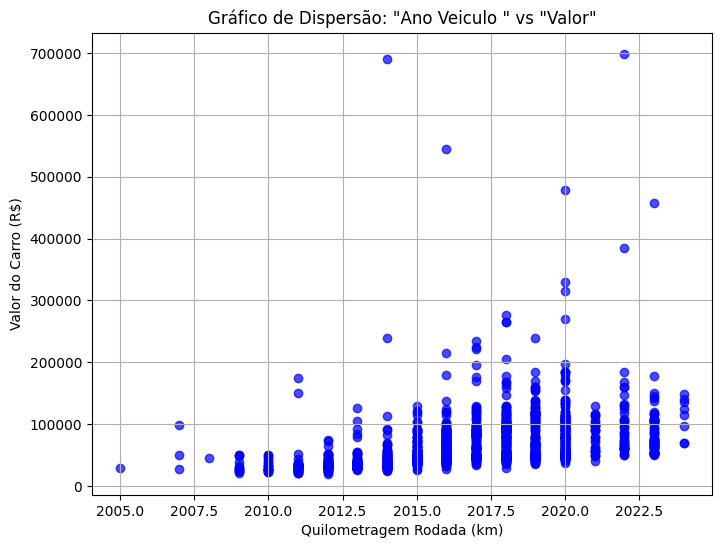

,ano,valor
ano,1.000000,0.367538
valor,0.367538,1.000000


In [17]:
# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['ano'], df['valor'], color='blue', alpha=0.7)
plt.title('Gráfico de Dispersão: "Ano Veiculo " vs "Valor"')
plt.xlabel('Quilometragem Rodada (km)')
plt.ylabel('Valor do Carro (R$)')
plt.grid(True)
plt.show()
corr = df[['ano', 'valor']].corr()
corr

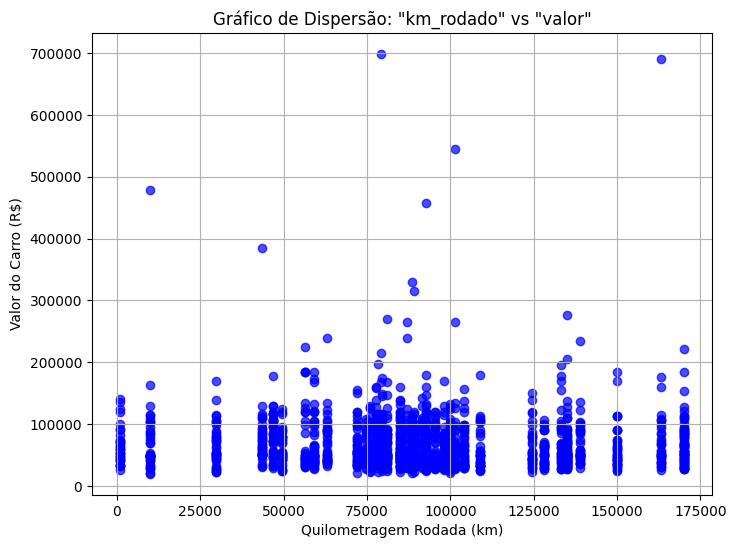

,valor,km_rodado
valor,1.000000,-0.023335
km_rodado,-0.023335,1.000000


In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['km_rodado'], df['valor'], color='blue', alpha=0.7)
plt.title('Gráfico de Dispersão: "km_rodado" vs "valor"')
plt.xlabel('Quilometragem Rodada (km)')
plt.ylabel('Valor do Carro (R$)')
plt.grid(True)
plt.show()
corr = df[['valor', 'km_rodado']].corr()
corr